In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier



In [44]:
# 데이터 로드
wine_df = pd.read_csv('./data/WineQT.csv')
print(wine_df.shape)
wine_df.head()

(1143, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [45]:
# 퀄리티를 3단계로 나눔
# 6단계로 하면 3, 8 값이 너무 부족 -> f1-score가 0
def quality_group(q):
    if q <= 4:
        return 0   # low
    elif q <= 6:
        return 1   # medium
    else:
        return 2   # high

wine_df['quality_group'] = wine_df['quality'].apply(quality_group)

In [46]:
# 입력/라벨 (3단계 분류)
X = wine_df.drop(columns=['quality', 'quality_group']).to_numpy()
y = wine_df['quality_group'].to_numpy()

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1143, 12) (1143,)
(914, 12) (914,)
(229, 12) (229,)


In [47]:
# 결측치 및 자료형 확인 - 결측치 없음            결측치 확인
print(wine_df.info())

<class 'pandas.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
 13  quality_group         1143 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 125.1 KB
None


In [48]:
# 라벨 분포 확인 - 3단계 분류 전
wine_df['quality'].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

In [49]:
# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
wine_df['quality_group'].value_counts()

quality_group
1    945
2    159
0     39
Name: count, dtype: int64

In [51]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'n_estimators': [10, 50, 100] # Example values, adjust as needed
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

cv_results_df = pd.DataFrame(grid.cv_results_)

In [52]:
cv_results_df = pd.DataFrame(grid.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020047,0.012834,0.001468,0.001000,None,10,"{'max_depth': None, 'n_estimators': 10}",0.841530,0.885246,0.836066,0.852459,0.840659,0.851192,0.017857,5
1,0.062676,0.006364,0.003717,0.002081,None,50,"{'max_depth': None, 'n_estimators': 50}",0.852459,0.885246,0.846995,0.836066,0.857143,0.855582,0.016412,1
2,0.132397,0.037888,0.005368,0.001028,None,100,"{'max_depth': None, 'n_estimators': 100}",0.846995,0.868852,0.852459,0.836066,0.851648,0.851204,0.010584,4
3,0.008070,0.000111,0.000689,0.000132,5,10,"{'max_depth': 5, 'n_estimators': 10}",0.841530,0.868852,0.830601,0.808743,0.824176,0.834781,0.020071,12
4,0.038347,0.000253,0.002062,0.000038,5,50,"{'max_depth': 5, 'n_estimators': 50}",0.846995,0.868852,0.825137,0.830601,0.851648,0.844647,0.015610,9
5,0.079354,0.002181,0.003889,0.000135,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.836066,0.857923,0.841530,0.825137,0.846154,0.841362,0.010850,11
6,0.010335,0.000308,0.000734,0.000058,10,10,"{'max_depth': 10, 'n_estimators': 10}",0.814208,0.890710,0.846995,0.825137,0.835165,0.842443,0.026458,10
7,0.052264,0.002460,0.002472,0.000110,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.830601,0.879781,0.857923,0.846995,0.840659,0.851192,0.016824,6
8,0.097097,0.001807,0.004432,0.000203,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.836066,0.868852,0.863388,0.836066,0.846154,0.850105,0.013695,8
9,0.010433,0.000167,0.000673,0.000018,15,10,"{'max_depth': 15, 'n_estimators': 10}",0.846995,0.896175,0.836066,0.846995,0.840659,0.853378,0.021792,3


In [53]:
# 1️⃣ binary 라벨 생성
wine_df["quality_binary"] = (wine_df["quality"] >= 6).astype(int)

# 2️⃣ X, y 명확하게 정의
X = wine_df.drop(columns=["quality", "quality_binary"]).values
y = wine_df["quality_binary"].values

# 3️⃣ split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4️⃣ scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5️⃣ 새 모델로 다시 학습
rf = RandomForestClassifier(max_depth=15, n_estimators=50, random_state=42)
rf.fit(X_train_scaled, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",50
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",15
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

In [54]:
y_pred = rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# 데이터 불균형으로 인해 low 등급은 충분히 학습되지 않음,샘플 수 부족

              precision    recall  f1-score   support

           0       0.85      0.71      0.78       105
           1       0.79      0.90      0.84       124

    accuracy                           0.81       229
   macro avg       0.82      0.80      0.81       229
weighted avg       0.82      0.81      0.81       229



In [55]:
# -----------------------------
# 1. 기존 모델
# -----------------------------
rf_default = RandomForestClassifier(
    max_depth=15,
    n_estimators=50,
    random_state=42
)

rf_default.fit(X_train_scaled, y_train)
y_pred_default = rf_default.predict(X_test_scaled)

print("===== Default RandomForest =====")
print("Accuracy:", accuracy_score(y_test, y_pred_default))
print(classification_report(y_test, y_pred_default))


# -----------------------------
# 2. class_weight 적용 모델
# -----------------------------
rf_balanced = RandomForestClassifier(
    max_depth=15,
    n_estimators=50,
    class_weight='balanced',
    random_state=42
)

rf_balanced.fit(X_train_scaled, y_train)
y_pred_balanced = rf_balanced.predict(X_test_scaled)

print("===== Balanced RandomForest =====")
print("Accuracy:", accuracy_score(y_test, y_pred_balanced))
print(classification_report(y_test, y_pred_balanced))

===== Default RandomForest =====
Accuracy: 0.8122270742358079
              precision    recall  f1-score   support

           0       0.85      0.71      0.78       105
           1       0.79      0.90      0.84       124

    accuracy                           0.81       229
   macro avg       0.82      0.80      0.81       229
weighted avg       0.82      0.81      0.81       229

===== Balanced RandomForest =====
Accuracy: 0.8209606986899564
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       105
           1       0.82      0.86      0.84       124

    accuracy                           0.82       229
   macro avg       0.82      0.82      0.82       229
weighted avg       0.82      0.82      0.82       229



클래스 불균형 문제를 해결하기 위해 class_weight='balanced'를 적용했으나, 소수 클래스의 샘플 수가 매우 적어 성능 개선 효과는 미미하였다.

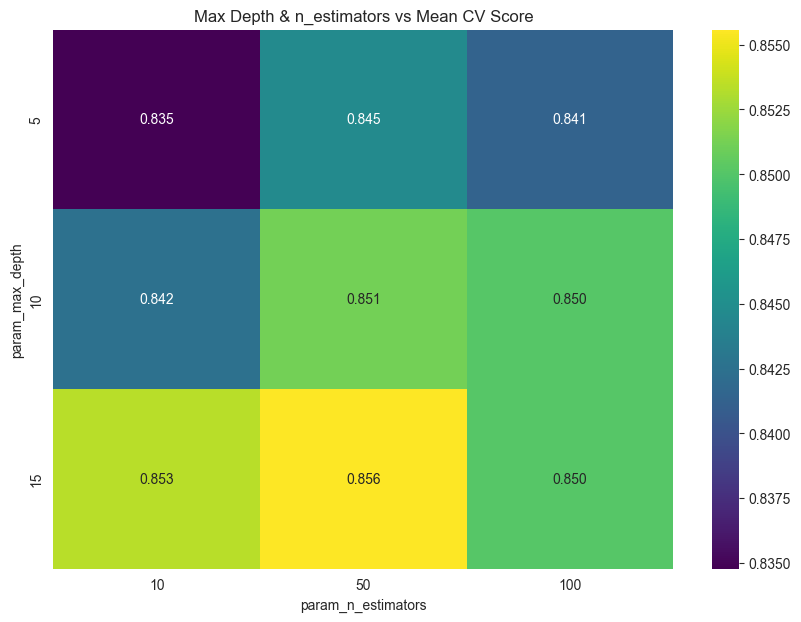

Best Params: {'max_depth': None, 'n_estimators': 50}
Best CV Score: 0.8555815768930521


In [56]:
cv_pivot = cv_results_df.pivot_table(
    columns='param_n_estimators',
    index='param_max_depth',
    values='mean_test_score',
)

plt.figure(figsize=(10, 7))
sns.heatmap(cv_pivot, annot=True, fmt=".3f", cmap="viridis")
plt.title("Max Depth & n_estimators vs Mean CV Score")
plt.show()

print("Best Params:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

RandomForest는 여러 트리의 평균을 사용하기 때문에 깊은 트리에서도 과적합이 완화되며, max_depth=15, n_estimators=50 조합에서 가장 높은 평균 교차검증 정확도(0.857)를 보였다.

In [57]:
best_model = grid.best_estimator_
print("Test Accuracy:", best_model.score(X_test_scaled, y_test))

ValueError: X has 13 features, but RandomForestClassifier is expecting 12 features as input.

In [ ]:
# 2단계 라벨 생성
wine_df["quality_binary"] = (wine_df["quality"] >= 6).astype(int)

X = wine_df.drop(columns=["quality", "quality_binary"]).values
y = wine_df["quality_binary"].values

# 반드시 다시 split!
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Unique labels after split:", set(y_test))

In [ ]:
# 2단계 라벨 생성
# 0 = 5점 이하 / 1 = 6점 이상
wine_df["quality_binary"] = (wine_df["quality"] >= 6).astype(int)

X = wine_df.drop(columns=["quality", "quality_binary"]).values
y = wine_df["quality_binary"].values

# train/test 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 스케일링
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 학습
rf = RandomForestClassifier(
    max_depth=15,
    n_estimators=50,
    random_state=42
)

rf.fit(X_train_scaled, y_train)

# 예측
y_pred = rf.predict(X_test_scaled)

# 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 혼동행렬
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix (Binary)")
plt.show()

와인 품질 점수를 세 단계로 예측하는 것은 어려웠으나, 이를 2단계(좋음/보통) 이진분류로 재구성한 결과 정확도와 클래스 균형 성능이 크게 향상되었다.